In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# Loads the homes.csv dataset
homes = pd.read_csv('homes.csv')
homes

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1


In [3]:
# Loads input and output features
X = homes[['Bed', 'Floor']]
y = homes[['Price']]

In [4]:
# Splits the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), random_state=123)

In [5]:
# Initializes and trains a multilayer perceptron regressor model on the training set
# This cell takes a long time to run.
mlpReg_train = MLPRegressor(
    random_state=1, max_iter=500000, hidden_layer_sizes=[1]
).fit(X_train, np.ravel(y_train))

In [6]:
# Predicts the price of a 5 bedroom house with 2,896 sq ft
mlpReg_train.predict([[5, 2.896]])

/Users/slauer/anaconda3/envs/py3_10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([285.60540111])

Text(0, 0.5, 'Loss')

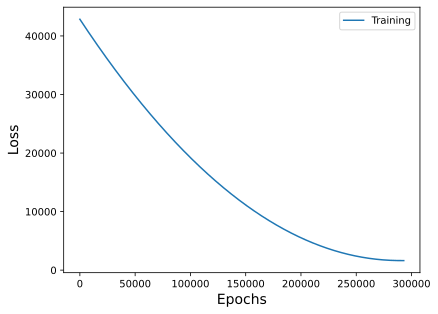

In [7]:
# Plots the loss curves for the training sets
f, ax = plt.subplots(1, 1)
sns.lineplot(
    x=range(len(mlpReg_train.loss_curve_)), y=mlpReg_train.loss_curve_, label='Training'
)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)

In [8]:
# Compare the final loss between train and test sets
print(mlpReg_train.loss_)
print(
    mean_squared_error(y_test, mlpReg_train.predict(X_test)) / 2
)  # division by 2 to get squared error to match squared error.

1631.1136892023274
2291.1337337033756


In [9]:
# Obtains the final weights and biases
print(mlpReg_train.coefs_)
print(mlpReg_train.intercepts_)

[array([[1.28940833e-315],
       [1.68314974e-316]]), array([[6.9239093e-316]])]
[array([-1.41389006]), array([285.60540111])]
